In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
#Reading in the train data
titanic_train = pd.read_csv("train.csv")

In [117]:
#to view the first 5 rows of the dataset
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
#setting the background style to dark for plots
sns.set_style('darkgrid')

The below heatmap shows correlation between the numerical columns in the dataset. There seems to be a negative correlation between Pclass and Fare, Pclass and Age, Pclass and Survived. There is a positive correlation between survived and Fare. These give insights into to the importance of these factors in predicting survival of passengers.

Text(0.5, 1.0, 'Titanic data heatmap')

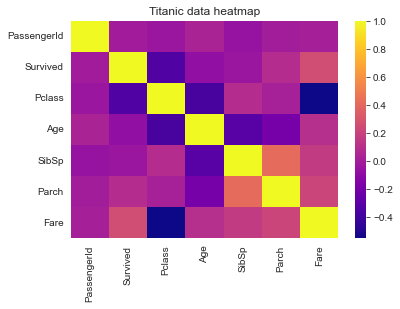

In [119]:
#heatmap of the dataset
sns.heatmap(titanic_train.corr(), cmap='plasma')
plt.title('Titanic data heatmap')

<AxesSubplot:>

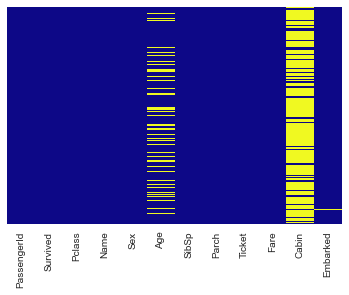

In [120]:
#using heatmaps to explore missing data, yellow marks indicate missing data in column
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False,cmap="plasma")

The below boxplot can be used to deduce the mean age in the three classes of passengers.The mean age were deduced as follows, class 1:37years, class 2 :29years, class 3:24years. These would be used to fill the missing ages in the age column. This is preferred to dropping the missing age rows because it is statistically closer to the real ages and prevents loss of data.

Text(0.5, 1.0, 'Boxplot of Pclass against Age')

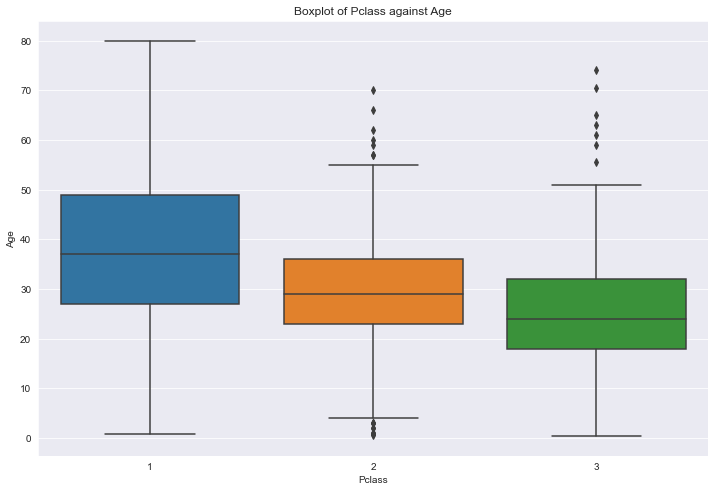

In [121]:
#using boxplots to determine average ages per class
plt.figure(figsize=(12,8))
sns.boxplot(x="Pclass",y="Age", data=titanic_train)
plt.title('Boxplot of Pclass against Age', fontsize=12)

In [122]:
def fill_age(col):
    """function that takes in an arguement col, and changes null values to avg
    age of the passenger class they belong to"""
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [123]:
#filling the missing ages with mean of ages per class
titanic_train['Age'] = titanic_train[["Age","Pclass"]].apply(fill_age, axis=1)

The below chart shows that of those who didn't survive, males were more than females. Among those who survived,females were more than males. This indicates that females survived the titanic more than males.This could possibly be attributed to saving children and females first before males.

Text(0.5, 1.0, 'Passenger Survival based on Sex')

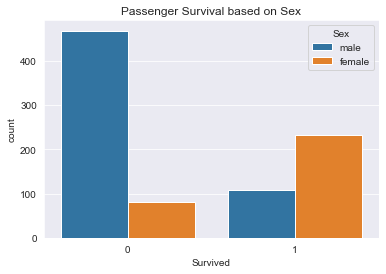

In [124]:
#to get a count of who survived and who didn't. This is good for
#classification problem to see the ratio of the actual target labels
sns.countplot(x="Survived",hue="Sex", data=titanic_train,)
plt.title('Passenger Survival based on Sex', fontsize=12)

Distrubtion of fares against ages in below jointplot shows that a large percentage of the passengers purchased cheap tickets and would most likely fall in 3rd class and be in less luxurious areas of the ship.

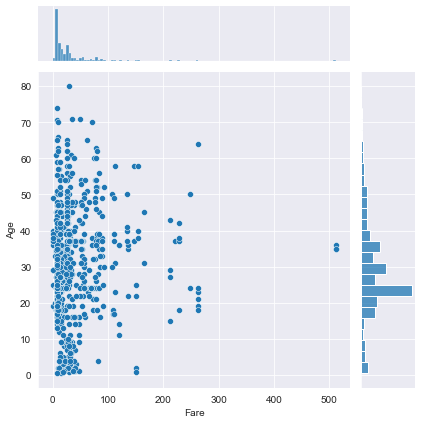

In [125]:
#jointplot showing distribution of fares and ages in a scatter and histplot
sns.jointplot(x='Fare',y='Age',data=titanic_train)

The plot below shows that larger percentage of the Passengers who did not survive were in 3rd class, and those who survived were in first mostly in first class.

Text(0.5, 1.0, 'Passenger Survival based on Class')

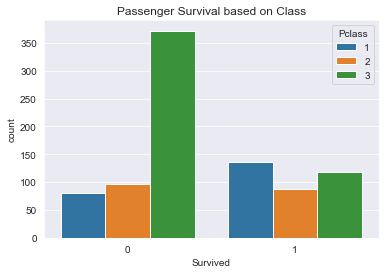

In [126]:
sns.countplot(x="Survived",hue="Pclass", data=titanic_train)
plt.title('Passenger Survival based on Class', fontsize=12)


Below plot shows that the most of the passengers on the titanic were around 18-40 years old. Those between 22-25years old make up a large chunk of this age range.

Text(0.5, 1.0, 'Plot of Age of passengers')

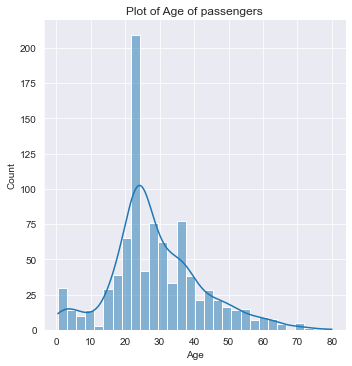

In [127]:
sns.displot(titanic_train["Age"],kde=True, bins=30)
plt.title('Plot of Age of passengers', fontsize=12)

# Machine Learning Section

In this section, we would prepare the data to be machine readable format and train a model inorde to be able to make predictions on thr test data.

In [128]:
#dropping the cabin column with lots of missing data and not needed for model training
titanic_train.drop("Cabin",axis=1, inplace=True)

In [129]:
#drop the rows left of missing data in embarked column
titanic_train.dropna(inplace=True)

In [130]:
#converting the sex column to 1 and 0 for male and female respectively

gender = {'male':1, 'female':0}

titanic_train['Sex'] = titanic_train['Sex'].map(gender)

In [131]:
#drop_first assist to solve the issue of columns perfect prediction of each other e.g row 1 below
#embark = pd.get_dummies(titanic_train["Embarked"]) 

In [132]:
#to merge the new formed columns with the original dataset
#titanic_train = pd.concat([titanic_train,embark], axis=1)
#titanic_train

In [133]:
#Drop columns not needed for training model
titanic_train.drop(["Embarked", "Name","Ticket","PassengerId"], axis=1, inplace=True)

In [134]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [135]:
#first thing is to seperate data into X and Y
X = titanic_train.drop("Survived",axis=1)
y = titanic_train["Survived"]


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Random Forest Model

Train a random forest model using the train data, evaluate its performance on a test data and making predictions on the test data.

In [137]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
%time
rfc.fit(X_train, y_train)


CPU times: total: 0 ns
Wall time: 0 ns


RandomForestRegressor()

In [138]:
# extract the predicted probabilities
rfc_pred = rfc.predict(X_test)
rfc_pred = rfc_pred.flatten()
print(rfc_pred.round(2))

[0.   0.12 0.98 1.   0.11 0.04 0.85 0.1  0.   0.92 0.99 1.   0.   0.55
 0.   0.17 1.   1.   0.94 0.15 0.02 0.09 0.01 0.05 0.07 0.37 0.36 0.72
 0.46 0.65 0.27 0.18 0.04 0.02 0.   0.34 0.85 0.05 0.29 0.05 0.71 0.2
 0.43 1.   0.95 0.05 0.49 0.98 0.86 0.   0.58 0.99 0.13 0.01 0.08 0.
 0.47 0.17 0.15 0.8  0.92 1.   1.   0.03 0.91 0.04 0.   0.97 0.42 0.15
 0.28 0.   0.99 1.   0.02 0.64 0.03 0.   0.06 0.59 0.14 0.45 0.81 0.17
 0.2  0.93 0.38 0.77 0.   1.   0.51 0.62 0.48 0.37 0.78 1.   0.63 0.27
 0.   0.72 0.85 0.85 0.12 0.94 0.8  0.06 1.   0.04 0.65 0.04 0.08 0.13
 0.91 0.8  0.   0.86 0.28 0.26 1.   0.85 0.16 0.03 0.11 0.02 0.01 0.92
 0.91 0.17 0.98 0.7  0.18 0.47 1.   0.64 0.09 0.26 0.4  0.29 0.43 0.14
 0.   0.27 0.04 0.03 0.   0.56 0.01 0.06 0.46 0.85 0.06 0.92 0.3  0.83
 0.12 0.7  0.1  0.   0.87 0.04 0.31 0.   0.13 0.44 0.05 0.86 0.54 0.
 0.06 0.06 0.84 0.04 0.77 0.22 0.01 0.37 0.32 0.  ]


An accuracy of 83% was achieved by using a random forest model on this dataset. Accuarcy used as the target classification label is fairly balanced.

In [139]:
approx_rfc_pred = np.where(rfc_pred > 0.5, 1, 0)
print(approx_rfc_pred)

print(classification_report(y_test,approx_rfc_pred))



[0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.81      0.76      0.78        71

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



The test data has to be prepared to be machine ready and have same columns as the data for training the model. These
would be carried out in the following below cells.

In [92]:
#Reading in the test data 
titanic_test = pd.read_csv("test.csv")
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [85]:
embark_test = pd.get_dummies(titanic_test["Embarked"]) 

titanic_test = pd.concat([titanic_test,embark_test], axis=1)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [93]:
passengerid = titanic_test['PassengerId']
titanic_test.drop(["Embarked", "Name","Ticket","PassengerId", "Cabin"], axis=1, inplace=True)

In [94]:
#converting the sex column to 1 and 0 for male and female respectively
titanic_test['Sex'] = titanic_test['Sex'].map(gender)

In [95]:
#filling age column in test data with avergae age per class
titanic_test['Age'] = titanic_test[["Age","Pclass"]].apply(fill_age, axis=1)

In [96]:
#getting the average fare per class on the test data
titanic_test.groupby(titanic_test['Pclass']).mean()['Fare']

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [97]:
#filling the missing row with mean of fare for that class
titanic_test['Fare'].fillna(12.45, inplace=True)

In [98]:
rfc_pred_test = rfc.predict(titanic_test)
rfc_pred_test = rfc_pred_test.flatten()
print(rfc_pred_test.round(2))


[0.13 0.07 0.64 0.19 0.39 0.13 0.15 0.08 0.96 0.12 0.   0.03 1.   0.26
 1.   0.97 0.06 0.67 0.76 0.07 0.38 0.72 0.99 0.52 0.92 0.   1.   0.56
 0.86 0.1  0.02 0.1  0.75 0.15 0.74 0.31 0.08 0.19 0.03 0.81 0.03 0.52
 0.08 1.   1.   0.01 0.45 0.1  0.73 0.74 0.68 0.05 0.94 0.81 0.23 0.
 0.   0.   0.02 1.   0.1  0.39 0.02 0.96 0.81 0.92 0.78 0.05 0.16 0.74
 0.82 0.02 0.26 0.1  1.   0.22 0.   0.78 0.14 0.82 0.96 0.17 0.33 0.
 0.57 0.09 0.9  0.48 0.82 0.98 0.18 0.04 0.69 0.   0.21 0.17 0.78 0.69
 0.74 0.01 0.99 0.08 0.1  0.14 0.58 0.11 0.18 0.1  0.02 0.   0.07 0.64
 0.99 0.96 0.78 0.22 0.23 0.87 0.57 0.99 0.93 0.12 1.   0.1  0.1  0.56
 0.13 0.85 0.48 0.   0.26 0.54 0.11 0.21 0.18 0.01 0.08 0.01 0.11 0.06
 0.   0.89 0.05 0.06 0.49 0.21 0.01 0.   0.52 0.11 1.   0.   0.3  0.69
 0.03 0.   1.   0.93 0.49 0.69 0.98 0.93 0.74 0.26 0.31 0.38 0.56 0.01
 0.99 0.08 0.   0.46 0.13 0.   0.11 1.   1.   0.41 0.99 0.71 0.14 0.2
 1.   0.1  0.84 0.01 0.88 0.54 0.   0.03 0.11 0.04 0.77 0.38 0.46 0.16
 0.97 0.27 

In [99]:
approx_rfc_pred_test = np.where(rfc_pred_test > 0.5, 1, 0)
print(approx_rfc_pred_test)


[0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [100]:
predictions = pd.DataFrame({"PassengerId":passengerid,'Survived': approx_rfc_pred_test,}, index= None)

predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
predictions.to_csv('Titanic_predictions.csv', index=False)

CPU times: total: 0 ns
Wall time: 0 ns




C:\Users\danio\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.81      0.79      0.80       105

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



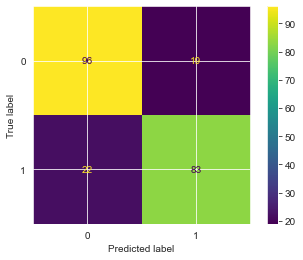

In [40]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier


%time
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf_predictions = clf.predict(X_test)

plot_confusion_matrix(clf, X_test, y_test)
print('\n')
print(classification_report(y_test, clf_predictions))